In [1]:
from __future__ import print_function, division

from pprint import pprint

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

import seaborn

from openeye.oechem import *
from openeye.oegraphsim import *
from openeye.oemolprop import *
from openeye.oedepict import *

import sys

import mpld3
%matplotlib inline
mpld3.enable_notebook()
seaborn.set_context("poster")

import oenotebook as oenb

/Users/dariabalatsky/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/dariabalatsky/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/dariabalatsky/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/dariabalatsky/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: 

In [2]:
from IPython.html.widgets import interact

from IPython.display import Image, HTML, display

/Users/dariabalatsky/anaconda/envs/py27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


/Users/dariabalatsky/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


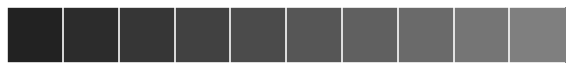

In [3]:
@interact
def choose_dark_palette(r=(0.,1),g=(0.,1.),b=(0.,1.),n=(3,18)):
    pal = seaborn.dark_palette((r,g,b),n)
    seaborn.palplot(pal)

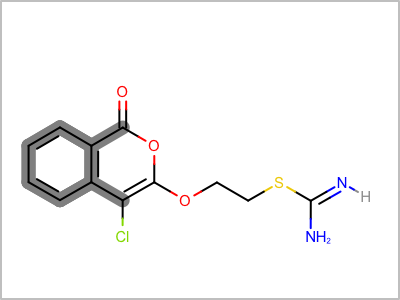

In [4]:
@interact
def choose_highlight_options(style=['Stick',"BallAndStick","Cogwheel"],r=(0,255),g=(0,255),b=(0,255),stickWidth=(0.,8.),ballRadius=(0.,8.),lineWidth=(0.,8.)):
    mol = OEGraphMol()
    OESmilesToMol(mol, "[H]/N=C(\N)/SCCOc1c(c2ccccc2c(=O)o1)Cl")
    opts = OE2DMolDisplayOptions(400.0, 300.0, OEScale_AutoScale)
    OEPrepareDepiction(mol)

    image = OEImage(opts.GetWidth(), opts.GetHeight())

    OEPrepareDepiction(mol)

    subs = OESubSearch("[cH]c[c]")
    disp = OE2DMolDisplay(mol,opts)

    stickWidthScale = 6.0
    monochrome = True
    innerContour = False
    if style == "Stick":
        highlight = OEHighlightByStick(OEColor(r,g,b), stickWidth, monochrome)
    elif style == "BallAndStick":
        highlight = OEHighlightByBallAndStick(OEColor(r,g,b), stickWidth, ballRadius, monochrome)
    elif style == "Cogwheel":
        highlight = OEHighlightByCogwheel(OEColor(r,g,b), lineWidth, stickWidth, ballRadius, innerContour, monochrome)
    
    unique = True
    for match in subs.Match(mol, unique):
        OEAddHighlighting(disp, highlight, match)

    OERenderMolecule(image,disp)
    
    OEDrawBorder(image, OEPen(OELightGrey, OELightGrey, OEFill_Off, 2.0))
    
    display(Image(OEWriteImageToString("png", image)))